<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Load-movies-&amp;-characters" data-toc-modified-id="Load-movies-&amp;-characters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load movies &amp; characters</a></span></li><li><span><a href="#Load-Persona-CMU" data-toc-modified-id="Load-Persona-CMU-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load Persona CMU</a></span></li><li><span><a href="#Merge-data" data-toc-modified-id="Merge-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Merge data</a></span></li></ul></li><li><span><a href="#Persona-analysis" data-toc-modified-id="Persona-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Persona analysis</a></span><ul class="toc-item"><li><span><a href="#Genre" data-toc-modified-id="Genre-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Genre</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Temporal-factors" data-toc-modified-id="Temporal-factors-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Temporal factors</a></span></li></ul></li><li><span><a href="#Main-&amp;-side-characters" data-toc-modified-id="Main-&amp;-side-characters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Main &amp; side characters</a></span><ul class="toc-item"><li><span><a href="#Load-graph-data" data-toc-modified-id="Load-graph-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load graph data</a></span></li><li><span><a href="#Calculate-pagerank" data-toc-modified-id="Calculate-pagerank-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Calculate pagerank</a></span></li><li><span><a href="#Use-pagerank-to-define-the-main-&amp;-side-char" data-toc-modified-id="Use-pagerank-to-define-the-main-&amp;-side-char-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use pagerank to define the main &amp; side char</a></span></li><li><span><a href="#Assign-main-&amp;-side-roles" data-toc-modified-id="Assign-main-&amp;-side-roles-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Assign main &amp; side roles</a></span></li><li><span><a href="#Merge" data-toc-modified-id="Merge-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Merge</a></span></li><li><span><a href="#Main-&amp;-side-analysis" data-toc-modified-id="Main-&amp;-side-analysis-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Main &amp; side analysis</a></span></li></ul></li></ul></div>

In [1]:
import ast
import re
#import spacy
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman'

# Data

## Load movies & characters

In [2]:
movies_path = "../Data/movies.csv" 
movies = pd.read_csv(movies_path)
movies['movie_release_year'] = movies['movie_release_date'].str.extract('(\d{4})', expand=False)
movies['movie_release_year'] = pd.to_numeric(movies['movie_release_year'], downcast='integer')
movies

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_genres_cleaned,movie_countries_cleaned,movie_languages_cleaned,movie_release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"['Thriller', 'Science Fiction', 'Horror', 'Adv...",United States of America,['English'],2001.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"['Mystery', 'Biographical film', 'Drama', 'Cri...",United States of America,['English'],2000.0
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"['Crime Fiction', 'Drama']",Norway,['Norwegian'],1988.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"['Thriller', 'Erotic thriller', 'Psychological...",United Kingdom,['English'],1987.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,['Drama'],Germany,['German'],1983.0
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,['Drama'],United States of America,['English'],2011.0
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"['Biographical film', 'Drama', 'Documentary']","Ireland"", ""/m/07ssc"": ""United Kingdom",['English'],2011.0
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"['Satire', 'Comedy']",United States of America,['English'],1972.0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"['Science Fiction', 'Japanese Movies', 'Advent...",Japan,['Japanese'],1992.0


In [3]:
characters_path = "../Data/characters.csv" 
characters = pd.read_csv(characters_path)
characters

,wikipedia_movie_id,freebase_movie_id,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_release,freebase_char_map,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


## Load Persona CMU

In [4]:
# Load Data
personas = pd.read_csv('../Data/Persona/25.100.lda.log.txt', sep='\t', header=None)
personas.columns = [
    'freebase_char_map',
    'wikipedia_movie_id',
    'movie_name',
    'char_name',
    'related_name',
    'token',
    'persona_code',
    'persona_distribution'
]

personas['persona_distribution'] = personas['persona_distribution'].apply(
    lambda x: np.array([float(num) for num in x.split()])
)

personas.head()

,freebase_char_map,wikipedia_movie_id,movie_name,char_name,related_name,token,persona_code,persona_distribution
0,e7,10000053,The Trap,she,her,5,36,"[0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0...."
1,e8,10000053,The Trap,she,her,5,49,"[0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,e12,10000053,The Trap,he,his,7,34,"[0.1, 0.0, 0.0, 0.02, 0.0, 0.0, 0.02, 0.0, 0.0..."
3,e19,10000053,The Trap,she,her,6,49,"[0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,e4,10000053,The Trap,Eve,Eve,11,31,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


## Merge data

In [5]:
# personas + characters
personas_characters = personas.merge(characters, on=['freebase_char_map','wikipedia_movie_id'], how='inner')
personas_characters.head()

,freebase_char_map,wikipedia_movie_id,movie_name,char_name,related_name,token,persona_code,persona_distribution,freebase_movie_id,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_release,freebase_char_id,freebase_actor_id
0,/m/02vcl4m,10004330,Halls of Montezuma,Pigeon Lane,Zelenko,5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.58, 0.21, 0.0, 0.0...",/m/02pzjvb,Pigeon Lane,1919-02-18,M,1.930,/m/0ffjvd,Jack Palance,30.0,/m/0h5cz0m,/m/02t_w8
1,/m/02tb80v,10004330,Halls of Montezuma,Lt. Col. Gilfillan,Gilfillan,3,47,"[0.0, 0.01, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0...",/m/02pzjvb,Lt. Col. Gilfillan,1917-06-18,M,1.854,NaN,Richard Boone,32.0,/m/0h4z9hs,/m/03c2b1
2,/m/02vc485,10016740,Mela,Roopa Singh,her,21,43,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Roopa Singh,1974-12-29,F,1.630,/m/0dryh9k,Twinkle Khanna,25.0,/m/0h2t0j9,/m/04rs51
3,/m/02tbjr0,10016740,Mela,Kishan Pyare,Kishan and Roopa,14,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Kishan Pyare,1965-03-14,M,1.680,/m/0dllcfn,Aamir Khan,34.0,/m/0gxp8dq,/m/015npr
4,/m/02vd85q,10016740,Mela,Shankar Shane,Shankar,10,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Shankar Shane,1966-09,M,NaN,/m/0dryh9k,Faisal Khan,NaN,/m/0h74mpf,/m/07457s


In [6]:
personas_characters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38432 entries, 0 to 38431
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   freebase_char_map     38432 non-null  object 
 1   wikipedia_movie_id    38432 non-null  int64  
 2   movie_name            38432 non-null  object 
 3   char_name             38432 non-null  object 
 4   related_name          38432 non-null  object 
 5   token                 38432 non-null  int64  
 6   persona_code          38432 non-null  int64  
 7   persona_distribution  38432 non-null  object 
 8   freebase_movie_id     38432 non-null  object 
 9   character_name        38432 non-null  object 
 10  actor_dob             35416 non-null  object 
 11  actor_gender          37787 non-null  object 
 12  actor_height          27025 non-null  float64
 13  actor_ethnicity       19227 non-null  object 
 14  actor_name            38432 non-null  object 
 15  actor_age_release  

In [7]:
# personas + characters + movies
persona_char_movie = personas_characters.merge(movies,  on=[
    'movie_name','wikipedia_movie_id', 'freebase_movie_id'], how='inner')

persona_char_movie.head()

,freebase_char_map,wikipedia_movie_id,movie_name,char_name,related_name,token,persona_code,persona_distribution,freebase_movie_id,character_name,...,actor_age_release,freebase_char_id,freebase_actor_id,movie_release_date,movie_box_office_revenue,movie_runtime,movie_genres_cleaned,movie_countries_cleaned,movie_languages_cleaned,movie_release_year
0,/m/02vcl4m,10004330,Halls of Montezuma,Pigeon Lane,Zelenko,5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.58, 0.21, 0.0, 0.0...",/m/02pzjvb,Pigeon Lane,...,30.0,/m/0h5cz0m,/m/02t_w8,1950,2650000.0,113.0,"['Action/Adventure', 'Action', 'War film']",United States of America,['English'],1950.0
1,/m/02tb80v,10004330,Halls of Montezuma,Lt. Col. Gilfillan,Gilfillan,3,47,"[0.0, 0.01, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0...",/m/02pzjvb,Lt. Col. Gilfillan,...,32.0,/m/0h4z9hs,/m/03c2b1,1950,2650000.0,113.0,"['Action/Adventure', 'Action', 'War film']",United States of America,['English'],1950.0
2,/m/02vc485,10016740,Mela,Roopa Singh,her,21,43,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Roopa Singh,...,25.0,/m/0h2t0j9,/m/04rs51,2000-01-07,NaN,NaN,"['Action', 'Drama']",India,['Hindi'],2000.0
3,/m/02tbjr0,10016740,Mela,Kishan Pyare,Kishan and Roopa,14,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Kishan Pyare,...,34.0,/m/0gxp8dq,/m/015npr,2000-01-07,NaN,NaN,"['Action', 'Drama']",India,['Hindi'],2000.0
4,/m/02vd85q,10016740,Mela,Shankar Shane,Shankar,10,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Shankar Shane,...,NaN,/m/0h74mpf,/m/07457s,2000-01-07,NaN,NaN,"['Action', 'Drama']",India,['Hindi'],2000.0


In [8]:
# persona_char_movie
unique_movie_ids_4 = persona_char_movie['wikipedia_movie_id'].nunique()
print("different 'Wikipedia movie ID':", unique_movie_ids_4)

different 'Wikipedia movie ID': 15156


# Persona analysis

In [9]:
if 'movie_genres_cleaned' in persona_char_movie.columns:
    persona_char_movie['movie_genres_cleaned'] = persona_char_movie['movie_genres_cleaned'].apply(lambda x: ast.literal_eval(x))
else:
    print("'movie_genres_cleaned' column does not exist or already contains real list data")

# Expand the list data in the 'movie_genres_cleaned' column into separate rows.
if 'movie_genres_cleaned' in persona_char_movie.columns:
    movie_genres_exploded = persona_char_movie.explode('movie_genres_cleaned')
    # print(movie_genres_exploded.head())
else:
    print("'movie_genres_cleaned' column does not exist or does not contain list data")

movie_genres_exploded.head()

,freebase_char_map,wikipedia_movie_id,movie_name,char_name,related_name,token,persona_code,persona_distribution,freebase_movie_id,character_name,...,actor_age_release,freebase_char_id,freebase_actor_id,movie_release_date,movie_box_office_revenue,movie_runtime,movie_genres_cleaned,movie_countries_cleaned,movie_languages_cleaned,movie_release_year
0,/m/02vcl4m,10004330,Halls of Montezuma,Pigeon Lane,Zelenko,5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.58, 0.21, 0.0, 0.0...",/m/02pzjvb,Pigeon Lane,...,30.0,/m/0h5cz0m,/m/02t_w8,1950,2650000.0,113.0,Action/Adventure,United States of America,['English'],1950.0
0,/m/02vcl4m,10004330,Halls of Montezuma,Pigeon Lane,Zelenko,5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.58, 0.21, 0.0, 0.0...",/m/02pzjvb,Pigeon Lane,...,30.0,/m/0h5cz0m,/m/02t_w8,1950,2650000.0,113.0,Action,United States of America,['English'],1950.0
0,/m/02vcl4m,10004330,Halls of Montezuma,Pigeon Lane,Zelenko,5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.58, 0.21, 0.0, 0.0...",/m/02pzjvb,Pigeon Lane,...,30.0,/m/0h5cz0m,/m/02t_w8,1950,2650000.0,113.0,War film,United States of America,['English'],1950.0
1,/m/02tb80v,10004330,Halls of Montezuma,Lt. Col. Gilfillan,Gilfillan,3,47,"[0.0, 0.01, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0...",/m/02pzjvb,Lt. Col. Gilfillan,...,32.0,/m/0h4z9hs,/m/03c2b1,1950,2650000.0,113.0,Action/Adventure,United States of America,['English'],1950.0
1,/m/02tb80v,10004330,Halls of Montezuma,Lt. Col. Gilfillan,Gilfillan,3,47,"[0.0, 0.01, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0...",/m/02pzjvb,Lt. Col. Gilfillan,...,32.0,/m/0h4z9hs,/m/03c2b1,1950,2650000.0,113.0,Action,United States of America,['English'],1950.0


## Genre

In [10]:
# Count the number of occurrences of each persona in different movie types
persona_genre_counts = (
    movie_genres_exploded
    .groupby(['persona_code', 'movie_genres_cleaned'])
    .size()
    .reset_index(name='count')
)

# Find the most common movie genres for each persona
top_genre_for_persona = (
    persona_genre_counts
    .groupby('persona_code')
    .apply(lambda x: x.loc[x['count'].idxmax()])
    .reset_index(drop=True)
)

print(top_genre_for_persona)

    persona_code movie_genres_cleaned  count
0              0             Thriller    700
1              1             Thriller    524
2              2           Short Film    290
3              3               Comedy   1467
4              4            Adventure     18
5              5               Action    921
6              6             Thriller    349
7              7                Drama      8
8              8                Drama     20
9              9                Drama    263
10            10                Drama   2948
11            11              Fantasy     48
12            12            Animation     36
13            13               Action    193
14            14                Drama     20
15            15               Comedy     94
16            16               Comedy    478
17            17               Horror   1391
18            18                Drama    863
19            19                Drama     54
20            20                Drama    230
21        

In [20]:
# Interactive Bar Chart of Persona and Movie Genres Count

# Create an interactive histogram
fig = px.bar(persona_genre_counts, x='persona_code', y='count', color='movie_genres_cleaned',
             title='Interactive Bar Chart of Persona and Movie Genres Count')

# Sort by the number of occurrences of persona
fig.update_layout(
    xaxis_title='Persona',
    yaxis_title='Count',
    xaxis={'categoryorder': 'total descending'},
    height=600
)

fig.show()

# Specify the full path for saving the HTML file
save_path = '../generated/html/persona_genre_mapping.html'

# Save the figure as an HTML file
fig.write_html(save_path)

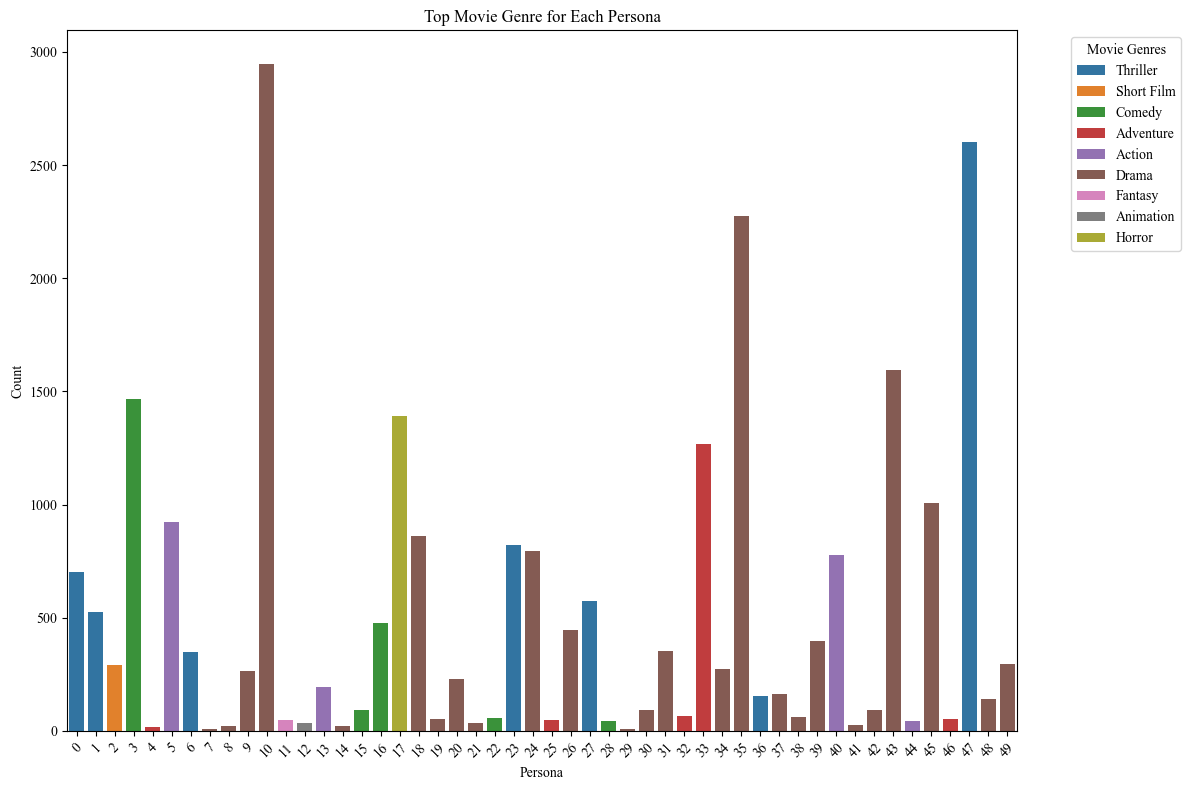

In [12]:
# Visualize the favorite movie genres for each persona
plt.figure(figsize=(12, 8))
sns.barplot(data=top_genre_for_persona, x='persona_code', y='count', hue='movie_genres_cleaned', dodge=False)
plt.title('Top Movie Genre for Each Persona')
plt.xlabel('Persona')
plt.ylabel('Count')
plt.legend(title='Movie Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Gender

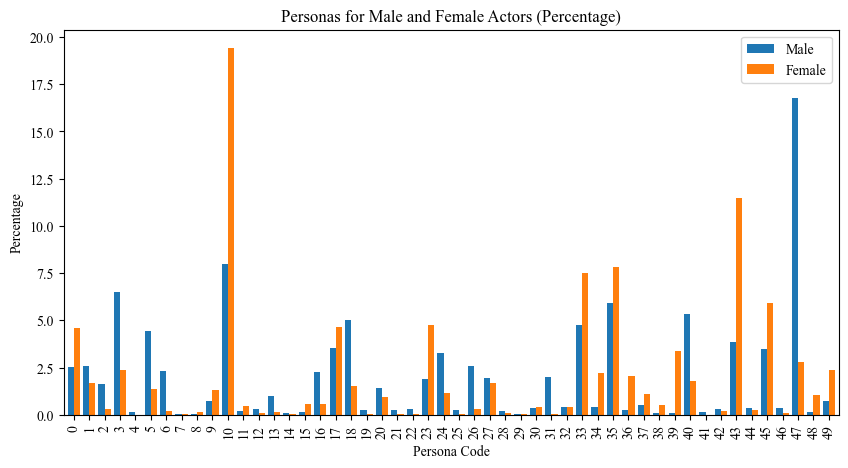

In [13]:
# Calculate the total number of male and female actors
total_male_actors = persona_char_movie[persona_char_movie['actor_gender'] == 'M'].shape[0]
total_female_actors = persona_char_movie[persona_char_movie['actor_gender'] == 'F'].shape[0]

# Analyze the relationship between "Persona_code" and "Actor Gender"
persona_gender_counts = persona_char_movie.groupby(['persona_code', 'actor_gender']).size().unstack()

# Calculate the percentages for each persona separately
persona_gender_percentages_male = persona_gender_counts['M'] / total_male_actors * 100
persona_gender_percentages_female = persona_gender_counts['F'] / total_female_actors * 100

# Combine the percentages for both male and female actors
combined_percentages = pd.concat([persona_gender_percentages_male, persona_gender_percentages_female], axis=1, keys=['Male', 'Female'])

# Visualize the results in a grouped bar plot
fig, ax = plt.subplots(figsize=(10, 5))

combined_percentages.plot(kind='bar', ax=ax, width=0.8)

ax.set_title('Personas for Male and Female Actors (Percentage)')
ax.set_ylabel('Percentage')
ax.set_xlabel('Persona Code')

plt.show()

In [22]:
# Analyze the relationship between "Persona_code" and "Actor Gender"
persona_gender_counts = persona_char_movie.groupby(['persona_code', 'actor_gender']).size().unstack()

# Calculate the percentages for each persona separately
persona_gender_percentages_male = persona_gender_counts['M'] / total_male_actors * 100
persona_gender_percentages_female = persona_gender_counts['F'] / total_female_actors * 100

# Combine the percentages for both male and female actors
combined_percentages = pd.concat([persona_gender_percentages_male, persona_gender_percentages_female], axis=1, keys=['Male', 'Female'])

# Reset index for compatibility with Plotly Express
combined_percentages = combined_percentages.reset_index()

# Melt the dataframe for Plotly Express
melted_percentages = pd.melt(combined_percentages, id_vars='persona_code', var_name='Gender', value_name='Percentage')

# Create an interactive grouped bar plot using Plotly Express
fig = px.bar(melted_percentages, x='persona_code', y='Percentage', color='Gender',
             labels={'Percentage': 'Percentage', 'persona_code': 'Persona Code'},
             title='Personas for Male and Female Actors (Percentage)',
             barmode='group', width=800, height=500)

# Show the interactive plot
fig.show()


# Specify the full path for saving the HTML file
save_path = '../generated/html/persona_gender_percentage.html'

# Save the figure as an HTML file
fig.write_html(save_path)


## Temporal factors

In [14]:
# find the year of the movie
persona_char_movie_year = persona_char_movie.copy()

persona_char_movie_year['year'] = persona_char_movie_year['movie_release_date'].str.extract('(\d{4})', expand=False)
persona_char_movie_year['year'] = pd.to_numeric(persona_char_movie_year['year'], downcast='integer')

persona_char_movie_year.head()

,freebase_char_map,wikipedia_movie_id,movie_name,char_name,related_name,token,persona_code,persona_distribution,freebase_movie_id,character_name,...,freebase_char_id,freebase_actor_id,movie_release_date,movie_box_office_revenue,movie_runtime,movie_genres_cleaned,movie_countries_cleaned,movie_languages_cleaned,movie_release_year,year
0,/m/02vcl4m,10004330,Halls of Montezuma,Pigeon Lane,Zelenko,5,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.58, 0.21, 0.0, 0.0...",/m/02pzjvb,Pigeon Lane,...,/m/0h5cz0m,/m/02t_w8,1950,2650000.0,113.0,"[Action/Adventure, Action, War film]",United States of America,['English'],1950.0,1950.0
1,/m/02tb80v,10004330,Halls of Montezuma,Lt. Col. Gilfillan,Gilfillan,3,47,"[0.0, 0.01, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0...",/m/02pzjvb,Lt. Col. Gilfillan,...,/m/0h4z9hs,/m/03c2b1,1950,2650000.0,113.0,"[Action/Adventure, Action, War film]",United States of America,['English'],1950.0,1950.0
2,/m/02vc485,10016740,Mela,Roopa Singh,her,21,43,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Roopa Singh,...,/m/0h2t0j9,/m/04rs51,2000-01-07,NaN,NaN,"[Action, Drama]",India,['Hindi'],2000.0,2000.0
3,/m/02tbjr0,10016740,Mela,Kishan Pyare,Kishan and Roopa,14,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Kishan Pyare,...,/m/0gxp8dq,/m/015npr,2000-01-07,NaN,NaN,"[Action, Drama]",India,['Hindi'],2000.0,2000.0
4,/m/02vd85q,10016740,Mela,Shankar Shane,Shankar,10,18,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/m/02pzxpz,Shankar Shane,...,/m/0h74mpf,/m/07457s,2000-01-07,NaN,NaN,"[Action, Drama]",India,['Hindi'],2000.0,2000.0


In [15]:
# Count occurrences for each combination of 'year', 'persona_code', and 'actor_gender'
data_counts = persona_char_movie_year.groupby(['year', 'persona_code', 'actor_gender']).size().reset_index(name='count')

# Get the top 3 personas for both male and female characters
top3_male_personas = data_counts[data_counts['actor_gender'] == 'M'].groupby('persona_code')['count'].sum().nlargest(5).index
top3_female_personas = data_counts[data_counts['actor_gender'] == 'F'].groupby('persona_code')['count'].sum().nlargest(5).index

# Filter the data for the top 3 personas for both male and female characters
male_top3_data = data_counts[(data_counts['actor_gender'] == 'M') & (data_counts['persona_code'].isin(top3_male_personas))]
female_top3_data = data_counts[(data_counts['actor_gender'] == 'F') & (data_counts['persona_code'].isin(top3_female_personas))]

# Concatenate the male and female data
combined_data = pd.concat([male_top3_data, female_top3_data])

# Create an interactive line chart
fig = px.line(
    combined_data,
    x='year',
    y='count',
    color='persona_code',
    facet_col='actor_gender',
    labels={'count': 'Occurrences'},
    title='Top 3 Personas for Male and Female Characters Over the Years'
)

# Add labels for personas
fig.update_layout(legend_title_text='Personas')

# Show the interactive plot
fig.show()

In [16]:
import pandas as pd
import plotly.express as px

# Count occurrences for each combination of 'year', 'persona_code', and 'actor_gender'
data_counts = persona_char_movie_year.groupby(['year', 'persona_code', 'actor_gender']).size().reset_index(name='count')

# Get the top 5 personas for both male and female characters
top5_male_personas = data_counts[data_counts['actor_gender'] == 'M'].groupby('persona_code')['count'].sum().nlargest(5).index
top5_female_personas = data_counts[data_counts['actor_gender'] == 'F'].groupby('persona_code')['count'].sum().nlargest(5).index

# Filter the data for the top 5 personas for both male and female characters
male_top5_data = data_counts[(data_counts['actor_gender'] == 'M') & (data_counts['persona_code'].isin(top5_male_personas))]
female_top5_data = data_counts[(data_counts['actor_gender'] == 'F') & (data_counts['persona_code'].isin(top5_female_personas))]

# Combine male and female data
combined_data = pd.concat([male_top5_data, female_top5_data])

# Create a stacked area chart
fig = px.area(
    combined_data,
    x='year',
    y='count',
    color='persona_code',
    facet_col='actor_gender',
    labels={'count': 'Occurrences'},
    title='Proportion of Top 5 Personas for Male and Female Characters Over the Years'
)

# Show the chart
fig.show()


In [17]:
import pandas as pd
import plotly.express as px

# Count occurrences for each combination of 'year', 'persona_code', and 'actor_gender'
data_counts = persona_char_movie_year.groupby(['year', 'persona_code', 'actor_gender']).size().reset_index(name='count')

# Get the top 5 personas for both male and female characters
top5_male_personas = data_counts[data_counts['actor_gender'] == 'M'].groupby('persona_code')['count'].sum().nlargest(5).index
top5_female_personas = data_counts[data_counts['actor_gender'] == 'F'].groupby('persona_code')['count'].sum().nlargest(5).index

# Filter the data for the top 5 personas for both male and female characters
male_top5_data = data_counts[(data_counts['actor_gender'] == 'M') & (data_counts['persona_code'].isin(top5_male_personas))]
female_top5_data = data_counts[(data_counts['actor_gender'] == 'F') & (data_counts['persona_code'].isin(top5_female_personas))]

# Combine male and female data
combined_data = pd.concat([male_top5_data, female_top5_data])

# Calculate the total count for each year and gender
total_counts = combined_data.groupby(['year', 'actor_gender'])['count'].sum().reset_index()

# Merge total counts with the combined_data to calculate proportions
combined_data = pd.merge(combined_data, total_counts, on=['year', 'actor_gender'], suffixes=('', '_total'))
combined_data['proportion'] = combined_data['count'] / combined_data['count_total']

# Create a stacked area chart with central alignment
fig = px.area(
    combined_data,
    x='year',
    y='proportion',
    color='persona_code',
    facet_col='actor_gender',
    facet_col_wrap=2,  # Set the number of columns in the facet grid
    labels={'proportion': 'Proportion'},
    title='Proportion of Top 10 Personas for Male and Female Characters Over the Years',
    range_x=[1920, combined_data['year'].max()],  # Set the starting point of the x-axis
    range_y=[0, 1]  # Set the y-axis range
)

# Show the chart
fig.show()


In [23]:
import pandas as pd
import plotly.express as px


# Count occurrences for each combination of 'year', 'persona_code', and 'actor_gender'
data_counts = persona_char_movie_year.groupby(['year', 'persona_code', 'actor_gender']).size().reset_index(name='count')

# Get the top 5 personas for both male and female characters
top5_male_personas = data_counts[data_counts['actor_gender'] == 'M'].groupby('persona_code')['count'].sum().nlargest(5).index
top5_female_personas = data_counts[data_counts['actor_gender'] == 'F'].groupby('persona_code')['count'].sum().nlargest(5).index

# Filter the data for the top 5 personas for both male and female characters
male_top5_data = data_counts[(data_counts['actor_gender'] == 'M') & (data_counts['persona_code'].isin(top5_male_personas))]
female_top5_data = data_counts[(data_counts['actor_gender'] == 'F') & (data_counts['persona_code'].isin(top5_female_personas))]

# Combine male and female data
combined_data = pd.concat([male_top5_data, female_top5_data])

# Calculate the total count for each year and gender
total_counts = data_counts.groupby(['year', 'actor_gender'])['count'].sum().reset_index()

# Calculate the proportion of each persona among all 50 personas
data_counts['proportion_all'] = data_counts['count'] / total_counts['count']

# Merge total counts with the combined_data to calculate proportions
combined_data = pd.merge(combined_data, total_counts, on=['year', 'actor_gender'], suffixes=('', '_total'))

# Calculate the proportion of each persona among the top 5 personas
combined_data['proportion'] = combined_data['count'] / combined_data['count_total']

# Normalize the proportions of the top 5 personas to make them sum up to 1
combined_data['proportion_normalized'] = combined_data.groupby(['year', 'actor_gender'])['proportion'].transform(lambda x: x / x.sum())

# Create a stacked area chart with central alignment and starting x-axis point at 1920
fig = px.area(
    combined_data,
    x='year',
    y='proportion_normalized',
    color='persona_code',
    facet_col='actor_gender',
    facet_col_wrap=2,  # Set the number of columns in the facet grid
    labels={'proportion_normalized': 'Proportion (Normalized)'},
    title='Proportion of Top 5 Personas (Normalized) for Male and Female Characters Over the Years',
    range_x=[1920, combined_data['year'].max()],  # Set the starting point of the x-axis
    range_y=[0, 1]  # Set the y-axis range
)

# Show the chart
fig.show()

# Specify the full path for saving the HTML file
save_path = '../generated/html/persona_gender_temporal.html'

# Save the figure as an HTML file
fig.write_html(save_path)


# Main & side characters

## Load graph data

## Calculate pagerank

Create a directed graph for each movie and calculate three centrality measures for characters.

## Use pagerank to define the main & side char

## Assign main & side roles

Calculate the difference in PageRank values to identify the maximum difference, which serves as the boundary between main and side characters.

## Merge

## Main & side analysis